In [1]:
import jax
import jax.numpy as jnp
import numpy as np
from matplotlib import pyplot as plt
import module.finite_differences as fd

ModuleNotFoundError: No module named 'module'

## Representation of 2D Field

In [2]:
N = 50
L = 1
dx = L / N

In [3]:
x = jnp.linspace(0, L, num = N)
y = jnp.linspace(0, L, num = N)

yy, xx = jnp.meshgrid(jnp.linspace(0, L, num = N), jnp.linspace(0, L, num = N))

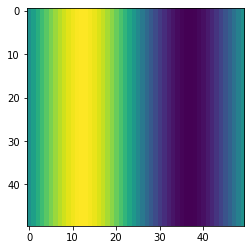

In [4]:
f = jnp.sin(2*np.pi*yy) # 2D field

plt.imshow(f)

In [5]:
f_flat = f.flatten()

## Differentiation Operators

In [6]:
D = np.zeros(shape = (N, N))

for i in range(1, N - 1):
        D[i, i - 1] = -1 
        D[i, i + 1] = +1 

D[0, 0] = -3
D[0, 1] = 4
D[0, 2] = -1

D[-1, -3] = 1
D[-1, -2] = -4
D[-1, -1] = 3

D /= 2*dx

In [7]:
Dy = np.kron(np.identity(N), D)
Dx = np.kron(D, np.identity(N))

## Examples

In [8]:
im = (Dy @ f_flat).reshape((N,N))

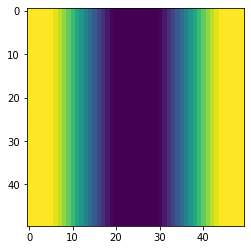

In [9]:
plt.imshow(im, vmin = -5, vmax = 5)

In [10]:
np.max(im)

Array(6.446351, dtype=float32)

In [11]:
## x squared

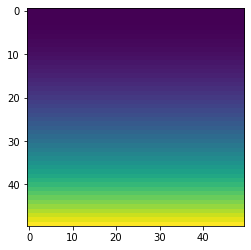

In [12]:
f = xx**2

plt.imshow(f)
f_flat = f.flatten()

In [13]:
Dx @ (Dx @ f_flat) ### bad precision

Array([2.0824654, 2.0824654, 2.0824654, ..., 2.0817413, 2.0817413,
       2.0817413], dtype=float32)

In [14]:
## example

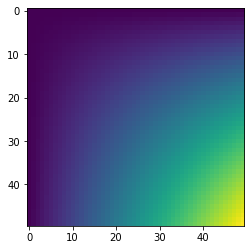

In [15]:
f = np.sin(xx) * yy
plt.imshow(f)

f_flat = f.flatten()

In [16]:
res = Dx @ (Dy @f_flat)

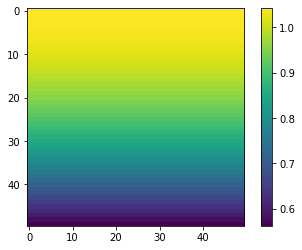

In [17]:
plt.imshow(res.reshape(N,N))
plt.colorbar()

### Dirichlet Differentiation Operators

In [18]:
D = np.zeros(shape = (N, N))

for i in range(1, N - 1):
        D[i, i - 1] = -1 
        D[i, i + 1] = +1 

D[0, 0] = -3
D[0, 1] = 4
D[0, 2] = -1

D[-1, -3] = 1
D[-1, -2] = -4
D[-1, -1] = 3

D /= 2*dx

In [19]:
Dy = np.kron(np.identity(N), D)
Dx = np.kron(D, np.identity(N))

## Examples

$$
(D_x^2 + D_y^2 + \mathbb{I}) f = 0
$$

and boundary conditions.

In [20]:
def boundify(op):
    for i in range(N*N):
        cond = False

        ## y boundaries
        
        if i % N == 0:
            cond = True

        if i % N == N - 1:
            cond = True


        ## x boundaries

        if i < N:
            cond = True

        if i >= N*N - N:
            cond = True

        if cond:
            op[i,:] = np.zeros((N*N))
            op[i,i] = 1

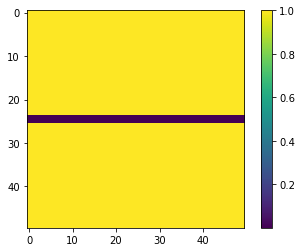

In [29]:
k = np.where(np.abs(xx - 0.5) < 0.02, 0.001, 1)
plt.imshow(k)
plt.colorbar()

In [23]:
k_mat = np.diag(k.flatten())

op = Dx@ k_mat @Dx + Dy@ k_mat@Dy

boundify(op)

In [24]:
boundary = np.zeros((N,N))
boundary[0,:] = 0
boundary[-1, :] = 1
boundary[:, 0] = np.sin(x/2 * np.pi)
boundary[:, -1] = np.sin(x/2 * np.pi)

boundary = boundary.flatten()

In [25]:
res = (np.linalg.inv(op) @ boundary).reshape((N,N))
# res1 = (np.linalg.inv(op) @ boundary).reshape((N,N))

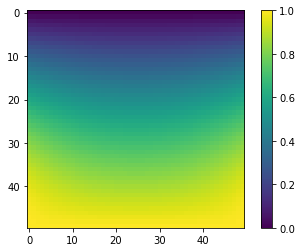

In [26]:
plt.imshow(res)
plt.colorbar()

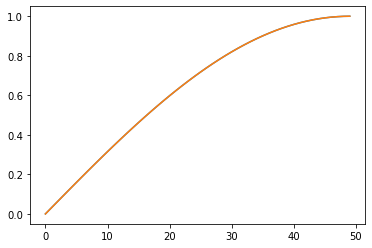

In [27]:
plt.plot(res[:,0])
plt.plot(res[:,-1])

In [28]:
jx = (Dx @ res.flatten()).reshape((N,N))
jy = (Dy @ res.flatten()).reshape((N,N))